In [38]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import warnings
import re
warnings.filterwarnings('ignore') 
import statsmodels

# Read Data

In [25]:
df=pd.read_csv("/content/Train_SU63ISt.csv",nrows = 11856)

In [26]:
train=df[0:10392] 
test=df[10392:]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10392 entries, 0 to 10391
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        10392 non-null  int64 
 1   Datetime  10392 non-null  object
 2   Count     10392 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 243.7+ KB


# Basic Changes

In [27]:
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 

In [28]:
df.index = df.Timestamp 

In [29]:
df.head()

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,25-08-2012 00:00,8
2012-08-25 01:00:00,1,25-08-2012 01:00,2
2012-08-25 02:00:00,2,25-08-2012 02:00,6
2012-08-25 03:00:00,3,25-08-2012 03:00,2
2012-08-25 04:00:00,4,25-08-2012 04:00,2


# Sampling based on Day using resample function

In [31]:
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean()

In [33]:
test.head(4)

,ID,Count
Datetime,,
2013-11-01,10403.5,161.583333
2013-11-02,10427.5,103.083333
2013-11-03,10451.5,76.833333
2013-11-04,10475.5,156.416667


# Aggregation day basis

In [9]:
df

,ID,Count
Datetime,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000
...,...,...
2013-12-27,11747.5,161.166667
2013-12-28,11771.5,128.500000
2013-12-29,11795.5,97.083333


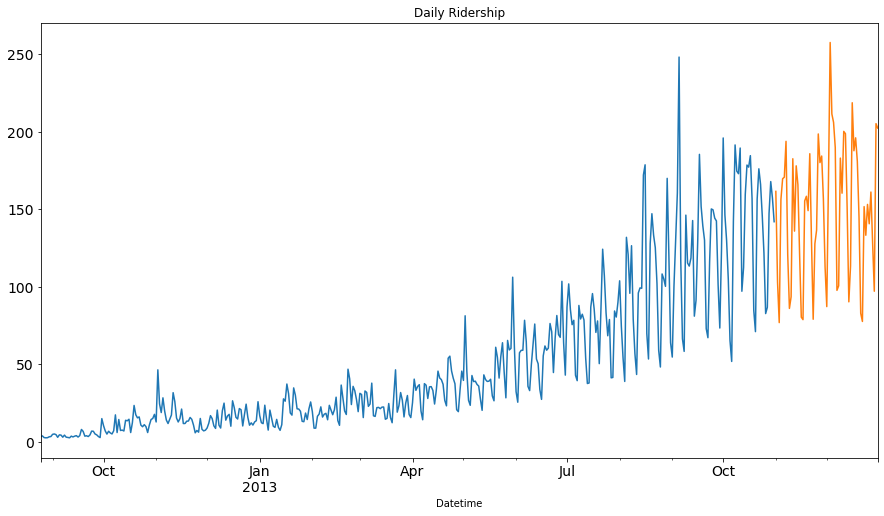

In [12]:
train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

# Technique #1 : Naive Approach

In [13]:
dd= np.asarray(train.Count)

In [16]:
train.head(5)

,ID,Count
Datetime,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000


In [17]:
dd

array([  3.16666667,   3.66666667,   2.58333333,   2.41666667,
         2.5       ,   3.08333333,   3.25      ,   4.66666667,
         4.91666667,   4.5       ,   2.75      ,   4.33333333,
         4.16666667,   2.83333333,   4.16666667,   2.83333333,
         2.66666667,   2.41666667,   3.5       ,   3.        ,
         3.5       ,   3.83333333,   2.91666667,   3.83333333,
         7.83333333,   6.58333333,   3.5       ,   3.75      ,
         3.25      ,   4.25      ,   6.75      ,   6.66666667,
         4.91666667,   4.33333333,   3.25      ,   2.58333333,
        14.83333333,  10.33333333,   6.91666667,   4.83333333,
         6.66666667,   5.58333333,   4.91666667,   7.        ,
        17.25      ,   5.83333333,  14.25      ,   7.16666667,
         7.41666667,   6.83333333,  13.75      ,  13.41666667,
        14.41666667,   5.83333333,  12.16666667,  23.33333333,
        17.33333333,  15.33333333,  15.91666667,  10.66666667,
         9.58333333,  10.91666667,   9.66666667,   5.83

In [18]:
dd[len(dd)-1]

142.0

In [19]:
y_hat = test.copy()

In [21]:
y_hat['naive'] = dd[len(dd)-1]

In [22]:
y_hat['naive']

Datetime
2013-11-01    142.0
2013-11-02    142.0
2013-11-03    142.0
2013-11-04    142.0
2013-11-05    142.0
              ...  
2013-12-27    142.0
2013-12-28    142.0
2013-12-29    142.0
2013-12-30    142.0
2013-12-31    142.0
Freq: D, Name: naive, Length: 61, dtype: float64

In [23]:
y_hat

,ID,Count,naive
Datetime,,,
2013-11-01,10403.5,161.583333,142.0
2013-11-02,10427.5,103.083333,142.0
2013-11-03,10451.5,76.833333,142.0
2013-11-04,10475.5,156.416667,142.0
2013-11-05,10499.5,169.750000,142.0
...,...,...,...
2013-12-27,11747.5,161.166667,142.0
2013-12-28,11771.5,128.500000,142.0
2013-12-29,11795.5,97.083333,142.0


In [35]:
y_hat_avg.head(5)

,ID,Count,moving_avg_forecast
Datetime,,,
2013-11-01,10403.5,161.583333,131.761111
2013-11-02,10427.5,103.083333,131.761111
2013-11-03,10451.5,76.833333,131.761111
2013-11-04,10475.5,156.416667,131.761111
2013-11-05,10499.5,169.750000,131.761111


In [36]:
train['Count'].rolling(60).mean().iloc[-1]

131.76111111111112

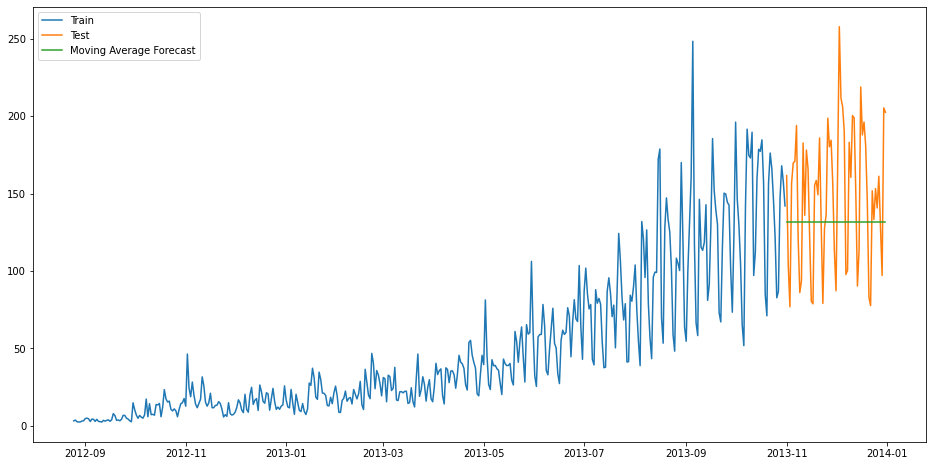

In [34]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [40]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.moving_avg_forecast))
print(rms)
#RMSE = 46.7284072511

NameError: ignored